# Post-processing

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import xarray as xr

## Create a reconstruction result object

In [20]:
res = cfr.ReconRes('./data/exp_mc', verbose=True)
print(res)

>>> recon.paths:
['./data/exp_mc/job_r00_recon.nc', './data/exp_mc/job_r01_recon.nc', './data/exp_mc/job_r02_recon.nc', './data/exp_mc/job_r03_recon.nc', './data/exp_mc/job_r04_recon.nc', './data/exp_mc/job_r05_recon.nc', './data/exp_mc/job_r06_recon.nc', './data/exp_mc/job_r07_recon.nc', './data/exp_mc/job_r08_recon.nc', './data/exp_mc/job_r09_recon.nc', './data/exp_mc/job_r10_recon.nc', './data/exp_mc/job_r11_recon.nc', './data/exp_mc/job_r12_recon.nc', './data/exp_mc/job_r13_recon.nc', './data/exp_mc/job_r14_recon.nc', './data/exp_mc/job_r15_recon.nc', './data/exp_mc/job_r16_recon.nc', './data/exp_mc/job_r17_recon.nc', './data/exp_mc/job_r18_recon.nc', './data/exp_mc/job_r19_recon.nc']


## Load reconstructed variables

In [21]:
vn = 'nino3.4'
res.load(vn)
res.da[vn]

<xarray.DataArray 'nino3.4' (year: 2001, ens: 2000)>
array([[-0.88430866, -1.75183494,  2.57684972, ..., -0.0121106 ,
        -2.10259507, -1.11689106],
       [-0.88430866, -1.75183494,  2.57684972, ..., -0.0121106 ,
        -2.10259507, -1.11689106],
       [-0.88430866, -1.75183494,  2.57684972, ..., -0.0121106 ,
        -2.10259507, -1.11689106],
       ...,
       [ 1.79387203,  1.12187122,  4.66861962, ...,  2.51066123,
         0.85071839,  1.25344533],
       [-1.06585252, -1.84212545,  1.91320392, ..., -0.13557369,
        -1.97703484, -1.4398852 ],
       [-1.58792294, -2.41575241,  1.54307921, ..., -0.31388975,
        -2.38530187, -1.57250726]])
Coordinates:
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1994 1995 1996 1997 1998 1999 2000
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [17]:
vn = 'tas'
res.load(vn)
res.da[vn]

<xarray.DataArray 'tas' (year: 2001, ens: 2, lat: 42, lon: 63)>
array([[[[ 13.8125,  13.8125,  14.    , ...,  14.    ,  13.9375,
           13.8125],
         [ 17.    ,  16.6875,  16.25  , ...,  17.0625,  17.1875,
           17.    ],
         [ 16.375 ,  16.625 ,  16.3125, ...,  15.9375,  16.125 ,
           16.375 ],
         ...,
         [-13.1875, -12.8125, -12.875 , ..., -13.625 , -13.6875,
          -13.1875],
         [-14.6875, -14.625 , -14.5625, ..., -14.8125, -14.75  ,
          -14.6875],
         [-15.1875, -15.1875, -15.1875, ..., -15.1875, -15.1875,
          -15.1875]],

        [[ 13.8125,  13.8125,  14.    , ...,  14.    ,  13.9375,
           13.8125],
         [ 17.125 ,  16.75  ,  16.375 , ...,  17.1875,  17.3125,
           17.125 ],
         [ 16.4375,  16.75  ,  16.4375, ...,  16.    ,  16.1875,
           16.4375],
...
         [-14.125 , -13.8125, -13.875 , ..., -14.0625, -14.375 ,
          -14.125 ],
         [-15.5   , -15.5   , -15.4375, ..., -15.5   , -15.5   ,
          -15.5   ],
         [-15.9375, -15.9375, -16.    , ..., -15.875 , -15.875 ,
          -15.9375]],

        [[ 13.75  ,  13.6875,  13.9375, ...,  14.    ,  13.875 ,
           13.75  ],
         [ 17.    ,  16.5625,  16.1875, ...,  17.0625,  17.125 ,
           17.    ],
         [ 16.375 ,  16.625 ,  16.3125, ...,  16.    ,  16.1875,
           16.375 ],
         ...,
         [-12.75  , -12.25  , -12.375 , ..., -13.6875, -13.4375,
          -12.75  ],
         [-14.3125, -14.1875, -14.125 , ..., -14.4375, -14.375 ,
          -14.3125],
         [-14.8125, -14.8125, -14.875 , ..., -14.8125, -14.8125,
          -14.8125]]]])
Coordinates:
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1994 1995 1996 1997 1998 1999 2000
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * ens      (ens) int64 0 1

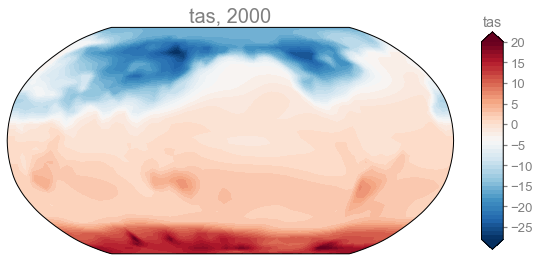

In [19]:
fig, ax = res.recons['tas'].plot(it=-1)

## Validation

In [43]:
import scipy.io as sio
import numpy as np

data = sio.loadmat('./data/BC09_NINO34.mat')
start_yr = 1874
end_yr = 2000
nyr = end_yr-start_yr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][12+i*12:14+i*12])

BC09_value = nino34
BC09_time=np.arange(start_yr, end_yr+1)

In [53]:
with xr.open_dataset('./data/recon_Corals.nc') as ds:
    Zhu22_value = ds['nino34'].values[2, :]
    Zhu22_time = ds['nino34'].year

In [54]:
print(BC09_time)

[1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887
 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901
 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000]


In [55]:
import pandas as pd

ts1 = pd.Series(index=res.recons['nino3.4'].time, data=res.recons['nino3.4'].median)
ts2 = pd.Series(index=BC09_time, data=BC09_value)
ts3 = pd.Series(index=Zhu22_time, data=Zhu22_value)

ts1 = ts1[(ts1.index >= start_yr) & (ts1.index <= end_yr)]
ts2 = ts2[(ts2.index >= start_yr) & (ts2.index <= end_yr)]
ts3 = ts3[(ts3.index >= start_yr) & (ts3.index <= end_yr)]

r12 = ts1.corr(ts2)
r13 = ts1.corr(ts3)
r23 = ts2.corr(ts3)
print(r12, r13, r23)

0.7973510769794939 0.724803952887961 0.7091863143851793


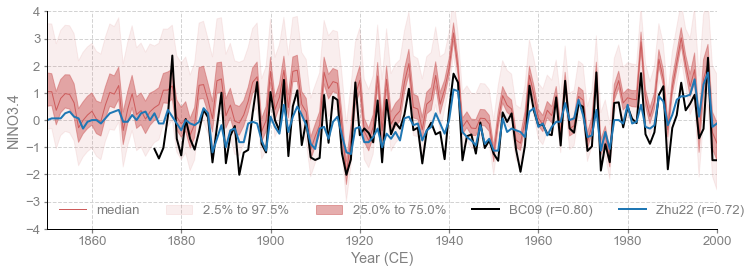

In [56]:
fig, ax = res.recons['nino3.4'].plot_qs(ylabel='NINO3.4')
ax.plot(BC09_time, BC09_value, color='k', label=f'BC09 (r={r12:.2f})')
ax.plot(Zhu22_time, Zhu22_value, color='tab:blue', label=f'Zhu22 (r={r13:.2f})')
ax.set_ylim(-4, 4)
ax.set_xlim(1850, 2000)
ax.legend(ncol=5)

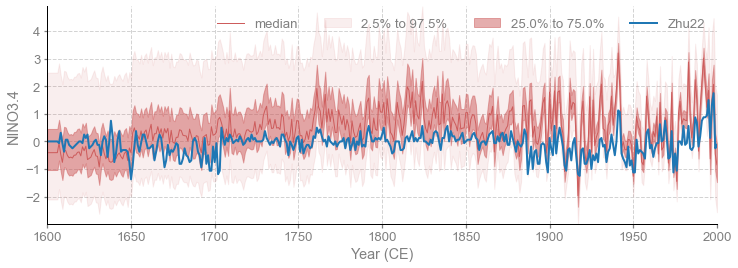

In [57]:
fig, ax = res.recons['nino3.4'].slice([1600, 2000]).plot_qs(ylabel='NINO3.4')
ax.plot(Zhu22_time, Zhu22_value, color='tab:blue', label=f'Zhu22')
ax.set_xlim(1600, 2000)
ax.legend(ncol=5)